$\text{getting value of g = 8.48. changing the air pressure is noticeably changing the value of g. air pressure thus is not completely irrelavant}\\$
$\text{Least counts: 1 mm for the air track and 0.1 g for the weighing scale.}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
M = 223.9/1000
mass = np.array([1.9, 3.4, 4.5,5.6,5.7, 8.6,10, 12.4,15.1, 20.1])/1000
a = np.array([7.19, 13.02, 17.37,21.08,21.69, 32.92,38.01,47.96,57.41, 75.58])/100
inverse_mass_function = mass/(mass+M)
fit, var = np.polyfit(inverse_mass_function, a, 1,cov = True)
m2 = fit[0]
c2 = fit[1]
m_err = np.sqrt(var[0][0])
print(a)
print(m2,c2,m_err)

[0.0719 0.1302 0.1737 0.2108 0.2169 0.3292 0.3801 0.4796 0.5741 0.7558]
9.272785132792816 -0.010934316832238757 0.055355549809596845


In [4]:
dm = 0.1/1000
da = a*(dm/mass)
dg_g = 100*np.sqrt(2*(dm/mass)**2)
print(da)
print(100*(m2-9.807)/m2)

[0.00378421 0.00382941 0.00386    0.00376429 0.00380526 0.00382791
 0.003801   0.00386774 0.00380199 0.0037602 ]
-5.761104776578465


In [12]:
friction = np.round((M+mass)*a - (mass*9.807), 4)
print(np.round(friction,4))
for i in range(0,len(friction)):
    print(np.round(mass[i],4), "&", np.abs(friction[i]), "\\", "\\\hline")

[-0.0024 -0.0037 -0.0045 -0.0065 -0.0061 -0.0078 -0.0092 -0.0083 -0.0109
 -0.0127]
0.0019 & 0.0024 \ \\hline
0.0034 & 0.0037 \ \\hline
0.0045 & 0.0045 \ \\hline
0.0056 & 0.0065 \ \\hline
0.0057 & 0.0061 \ \\hline
0.0086 & 0.0078 \ \\hline
0.01 & 0.0092 \ \\hline
0.0124 & 0.0083 \ \\hline
0.0151 & 0.0109 \ \\hline
0.0201 & 0.0127 \ \\hline


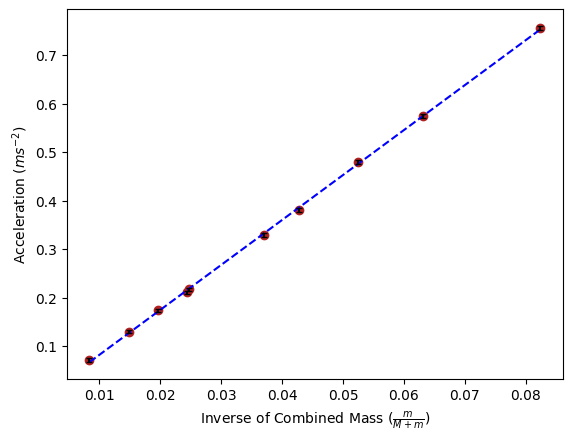

In [6]:
fiteq2 = inverse_mass_function*m2 + c2
plt.scatter(inverse_mass_function, a, color = 'firebrick')
plt.plot(inverse_mass_function, fiteq2, '--', color = 'blue')
plt.errorbar(inverse_mass_function, a, yerr = da, ecolor = 'black', capsize = 2.5, ls = 'none')
plt.xlabel(r"Inverse of Combined Mass $(\frac{m}{M+m})$")
plt.ylabel(r"Acceleration ($ms^{-2}$)")
plt.show()

$\text{state 1 and 0 being shown is for one of the photogates. 1 is for entering and 0 is for leaving that same photogate}$
$\text{For the other photogate state did not show anything. That is how the data for the two photogates is distinguished}$

$\text{part a plots of velocity versus extension}$

In [7]:
extension = np.array([1.2, 1.7, 2.2, 2.7, 3.2, 3.7, 3.9])
vel_1 = np.array([11.158, 16.162, 20.983, 25.724, 31.352, 42.042, 44.401])#photogate 1
vel_2 = np.array([9.121, 14.498, 19.821, 24.796, 30.622, 41.439, 43.775])#photogate 2

In [8]:
dx = 0.1
err_vel_1 = vel_1*(dx/extension)
print(err_vel_1)
err_vel_2 = vel_2*(dx/extension)
print(err_vel_2)

[0.92983333 0.95070588 0.95377273 0.95274074 0.97975    1.13627027
 1.13848718]
[0.76008333 0.85282353 0.90095455 0.91837037 0.9569375  1.11997297
 1.1224359 ]


In [9]:
fit1 = np.polyfit(extension, vel_1, 1)
fit2 = np.polyfit(extension, vel_2, 1)
slope1 = np.round(fit1[0],3)
slope2 = np.round(fit2[0],3)
intercept1 = np.round(fit1[1],3)
intercept2 = np.round(fit2[1],3)
print(slope1, slope2)
print((100*((slope1-slope2)/slope1)))

12.276 12.802
-4.284783317041381


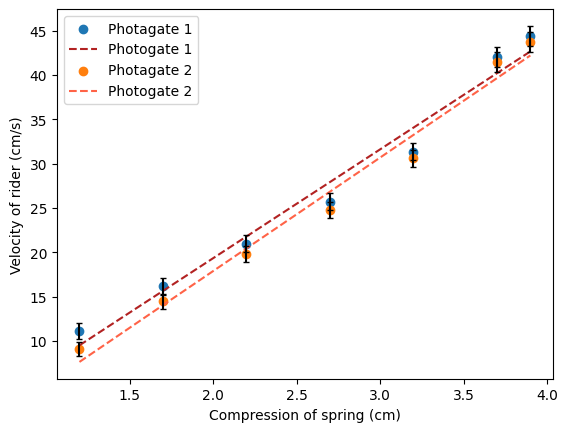

In [10]:
fiteq1 = extension*slope1 + intercept1
fiteq3 = extension*slope2 + intercept2
plt.scatter(extension, vel_1, label = 'Photagate 1')
plt.plot(extension, fiteq1, '--', color = 'firebrick', label = "Photogate 1")
plt.scatter(extension, vel_2, label = 'Photagate 2')
plt.plot(extension, fiteq3, '--', color = 'tomato', label = 'Photogate 2')
plt.errorbar(extension, vel_1, yerr = err_vel_1, ecolor = 'black', capsize = 2.5, ls = 'none')
plt.errorbar(extension, vel_2, yerr = err_vel_2, ecolor = 'black', capsize = 2.5, ls = 'none')
plt.xlabel(r'Compression of spring (cm)')
plt.ylabel(r'Velocity of rider (cm/s)')
plt.legend()
plt.show()

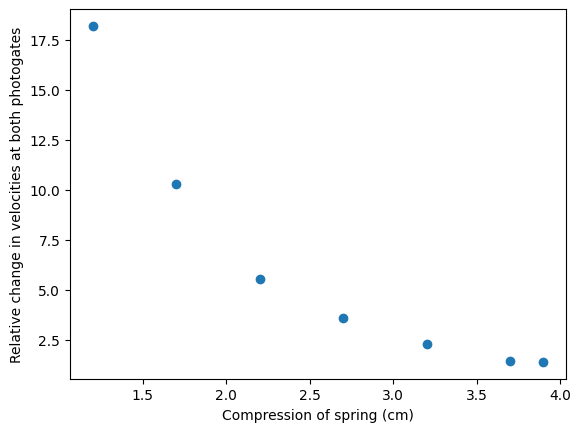

In [13]:
errors = np.array([18.187, 10.296, 5.536, 3.606, 2.326, 1.434, 1.411])
plt.scatter(extension, errors)
plt.xlabel(r'Compression of spring (cm)')
plt.ylabel(r'Relative change in velocities at both photogates')
plt.show()

In [14]:
9.272*(5.761/100)

0.53415992

In [16]:
9.272+0.534

9.806000000000001